### Line Profile Coordinates:

 - line 1:
 - start: 1093289.67,-2072898.30
 - end: 1112625.974,-2103669.339  

 - line 2:
 - start: 1065457.95,-2074144.75
 - end: 1092893.7608,-2117850.1937

 - line 3:
 - start: 1043907.65,-2085288.09
 - end: 1071320.397,-2128848.812

### Visualising the VELOCITY mean - cross sections ( same line from the previous melt regime analysis )

In [168]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd 
from shapely.geometry import LineString

In [170]:
# Prepping data for plotting:

#xlimit = (1009812.2080419888952747, 1191254.7718926025554538)
xlimit = (998543, 1304094)
ylimit = (-2197135.0244829640723765, -2015411.0521906625945121)

tif_path = "VEL_mean_masked.tif"
with rasterio.open(tif_path) as src:
    vel_mean = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
coastline = gpd.read_file('ice_front_2006.shp')
cross_sections = gpd.read_file('velocity_line_profiles_3031.shp')

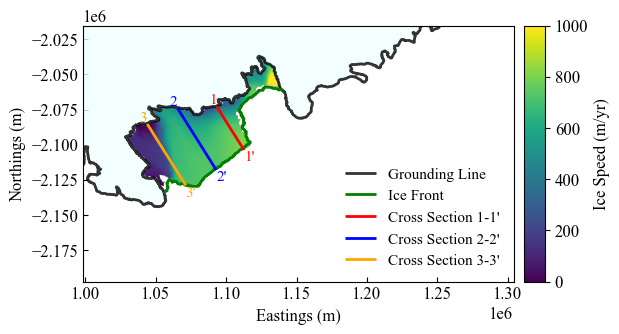

In [172]:
# Plotting the data

fig, ax = plt.subplots(figsize=(160/25.4, 100/25.4))  # mm to inches
img = ax.imshow(vel_mean, cmap='viridis', origin='upper', extent=extent, vmin=0, vmax=1000)

groundingline.plot(ax=ax, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')
#cross_sections.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Cross Sections')

# CROSS SECTION linestring shapefile plotting:
colors = ['red', 'blue', 'orange']
labels = ["Cross Section 1-1'", "Cross Section 2-2'", "Cross Section 3-3'"]
for i, (color, label) in enumerate(zip(colors, labels)):
    cross_sections.iloc[[i]].plot(
        ax=ax, edgecolor=color, facecolor='none', linewidth=2, label=label)
endpoint_labels = [("1", "1'"), ("2", "2'"), ("3", "3'")]
for i, (color, label, (label_start, label_end)) in enumerate(zip(colors, labels, endpoint_labels)):
    line = cross_sections.geometry.iloc[i]

    if line.geom_type == "MultiLineString":
        line = list(line.geoms)[0]
    x_start, y_start = line.coords[0]
    x_end, y_end = line.coords[-1]
    ax.text(x_start, y_start, label_start, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='bottom', horizontalalignment='right')
    ax.text(x_end, y_end, label_end, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='top', horizontalalignment='left')

# Rest of the plot:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(img, cax=cax)
cbar.set_label("Ice Speed (m/yr)", fontsize=12, fontfamily='Times New Roman')
for tick_label in cbar.ax.get_yticklabels():
    tick_label.set_fontsize(12)
    tick_label.set_family('Times New Roman')

ax.set_xlabel('Eastings (m)', fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel('Northings (m)', fontsize=12, fontfamily='Times New Roman')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
    label.set_family('Times New Roman')

# Corrects font for the scaling factor
ax.xaxis.get_offset_text().set_fontsize(12)
ax.xaxis.get_offset_text().set_family('Times New Roman')
ax.yaxis.get_offset_text().set_fontsize(12)
ax.yaxis.get_offset_text().set_family('Times New Roman')

ax.tick_params(direction='in')
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
#ax.set_title("Gaussian Smoothed BMR (WAOM)", fontsize=12, fontfamily='Times New Roman')
ax.set_aspect('equal')

legend = ax.legend(loc='lower right', prop={'size': 11, 'family': 'Times New Roman'})
legend.get_frame().set_edgecolor('none')  # Removes the legend border

plt.tight_layout()
#plt.savefig('WAOM_Cross_Section_Cords.jpg', dpi=500, bbox_inches='tight')
plt.show()


### Visualising the KNMAX mean - cross sections ( same line from the previous melt regime analysis )

In [175]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd 
from shapely.geometry import LineString

In [177]:
# Prepping data for plotting:

#xlimit = (1009812.2080419888952747, 1191254.7718926025554538)
xlimit = (998543, 1304094)
ylimit = (-2197135.0244829640723765, -2015411.0521906625945121)

tif_path = "knmax_MEAN_MASKED.tif"
with rasterio.open(tif_path) as src:
    vel_mean = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
coastline = gpd.read_file('ice_front_2006.shp')
cross_sections = gpd.read_file('velocity_line_profiles_3031.shp')

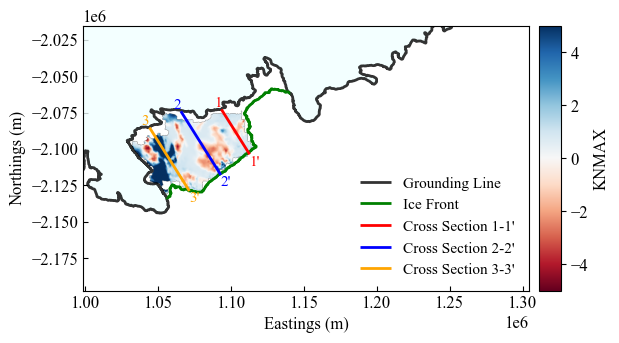

In [179]:
# Plotting the data

fig, ax = plt.subplots(figsize=(160/25.4, 100/25.4))  # mm to inches
img = ax.imshow(vel_mean, cmap='RdBu', origin='upper', extent=extent, vmin=-5, vmax=5)

groundingline.plot(ax=ax, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')
#cross_sections.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2, label='Cross Sections')

# CROSS SECTION linestring shapefile plotting:
colors = ['red', 'blue', 'orange']
labels = ["Cross Section 1-1'", "Cross Section 2-2'", "Cross Section 3-3'"]
for i, (color, label) in enumerate(zip(colors, labels)):
    cross_sections.iloc[[i]].plot(
        ax=ax, edgecolor=color, facecolor='none', linewidth=2, label=label)
endpoint_labels = [("1", "1'"), ("2", "2'"), ("3", "3'")]
for i, (color, label, (label_start, label_end)) in enumerate(zip(colors, labels, endpoint_labels)):
    line = cross_sections.geometry.iloc[i]

    if line.geom_type == "MultiLineString":
        line = list(line.geoms)[0]
    x_start, y_start = line.coords[0]
    x_end, y_end = line.coords[-1]
    ax.text(x_start, y_start, label_start, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='bottom', horizontalalignment='right')
    ax.text(x_end, y_end, label_end, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='top', horizontalalignment='left')

# Rest of the plot:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(img, cax=cax)
cbar.set_label("KNMAX", fontsize=12, fontfamily='Times New Roman')
for tick_label in cbar.ax.get_yticklabels():
    tick_label.set_fontsize(12)
    tick_label.set_family('Times New Roman')

ax.set_xlabel('Eastings (m)', fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel('Northings (m)', fontsize=12, fontfamily='Times New Roman')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
    label.set_family('Times New Roman')

# Corrects font for the scaling factor
ax.xaxis.get_offset_text().set_fontsize(12)
ax.xaxis.get_offset_text().set_family('Times New Roman')
ax.yaxis.get_offset_text().set_fontsize(12)
ax.yaxis.get_offset_text().set_family('Times New Roman')

ax.tick_params(direction='in')
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
#ax.set_title("Gaussian Smoothed BMR (WAOM)", fontsize=12, fontfamily='Times New Roman')
ax.set_aspect('equal')

legend = ax.legend(loc='lower right', prop={'size': 11, 'family': 'Times New Roman'})
legend.get_frame().set_edgecolor('none')  # Removes the legend border

plt.tight_layout()
#plt.savefig('WAOM_Cross_Section_Cords.jpg', dpi=500, bbox_inches='tight')
plt.show()


### creating a cross section of the velocities AND knmax

In [204]:
import numpy as np
import rasterio
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [206]:
# Start and end cords of each line:
start1 = np.array([1093289.67, -2072898.30])
end1 = np.array([1112625.974, -2103669.339])

start2 = np.array([1065457.95,-2074144.75])
end2 = np.array([1092893.7608,-2117850.1937])

start3 = np.array([1043907.65,-2085288.09])
end3 = np.array([1071320.397,-2128848.812])


In [208]:
tiff_path = "VEL_mean_masked.tif" 
with rasterio.open(tiff_path) as src:
    velocity = src.read(1)
    transform = src.transform
    xres, yres = transform.a, -transform.e
    x0, y0 = transform.c, transform.f
    nodata = src.nodata

    x = x0 + np.arange(velocity.shape[1]) * xres
    y = y0 - np.arange(velocity.shape[0]) * yres

interp = RegularGridInterpolator((y, x), velocity, bounds_error=False, fill_value=np.nan)


tiff_path_2 = "knmax_MEAN_MASKED.tif" 
with rasterio.open(tiff_path_2) as src:
    knmax = src.read(1)
    transform = src.transform
    xres, yres = transform.a, -transform.e
    x0, y0 = transform.c, transform.f
    nodata = src.nodata

    x_2 = x0 + np.arange(knmax.shape[1]) * xres
    y_2 = y0 - np.arange(knmax.shape[0]) * yres

interp_2 = RegularGridInterpolator((y_2, x_2), knmax, bounds_error=False, fill_value=np.nan)

In [209]:
num_points = 500

# Line 1: Velocity
line_x = np.linspace(start1[0], end1[0], num_points)
line_y = np.linspace(start1[1], end1[1], num_points)
line_1_coords = np.column_stack((line_y, line_x))  
vel_along_line_1 = interp(line_1_coords)
dx = np.diff(line_x)
dy = np.diff(line_y)
dist_1 = np.concatenate(([0], np.cumsum(np.hypot(dx, dy))))

knmax_along_line_1 = interp_2(line_1_coords)

###############################################################

# Line 2:
line_x = np.linspace(start2[0], end2[0], num_points)
line_y = np.linspace(start2[1], end2[1], num_points)
line_2_coords = np.column_stack((line_y, line_x))  
vel_along_line_2 = interp(line_2_coords)
dx = np.diff(line_x)
dy = np.diff(line_y)
dist_2 = np.concatenate(([0], np.cumsum(np.hypot(dx, dy))))

knmax_along_line_2 = interp_2(line_2_coords)

###############################################################

# Line 3:
line_x = np.linspace(start3[0], end3[0], num_points)
line_y = np.linspace(start3[1], end3[1], num_points)
line_3_coords = np.column_stack((line_y, line_x))  
vel_along_line_3 = interp(line_3_coords)
dx = np.diff(line_x)
dy = np.diff(line_y)
dist_3 = np.concatenate(([0], np.cumsum(np.hypot(dx, dy))))

knmax_along_line_3 = interp_2(line_3_coords)


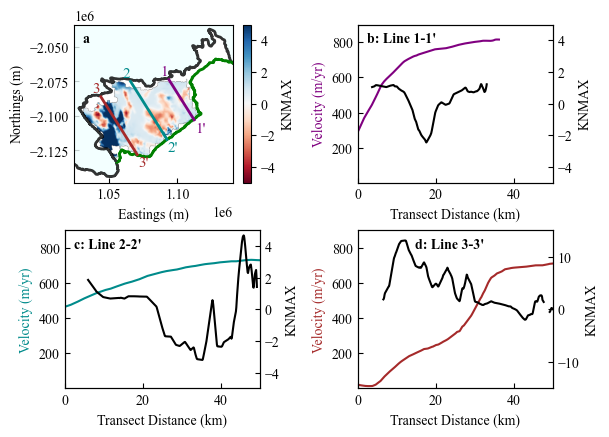

In [309]:
fig, axs = plt.subplots(2, 2, figsize=(160/25.4, 120/25.4))
axs = axs.flatten()

xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

######################################################### SUBPLOT 1
ax = axs[0]  
img = ax.imshow(vel_mean, cmap='RdBu', origin='upper', extent=extent, vmin=-5, vmax=5)

groundingline.plot(ax=ax, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')

colors = ['purple', 'darkcyan', 'brown']
labels = ["Cross Section 1-1'", "Cross Section 2-2'", "Cross Section 3-3'"]
for i, (color, label) in enumerate(zip(colors, labels)):
    cross_sections.iloc[[i]].plot(
        ax=ax, edgecolor=color, facecolor='none', linewidth=2, label=label)

endpoint_labels = [("1", "1'"), ("2", "2'"), ("3", "3'")]
for i, (color, label, (label_start, label_end)) in enumerate(zip(colors, labels, endpoint_labels)):
    line = cross_sections.geometry.iloc[i]

    if line.geom_type == "MultiLineString":
        line = list(line.geoms)[0]
    x_start, y_start = line.coords[0]
    x_end, y_end = line.coords[-1]
    ax.text(x_start, y_start, label_start, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='bottom', horizontalalignment='right')
    ax.text(x_end, y_end, label_end, fontsize=11, fontfamily='Times New Roman',
            color=color, verticalalignment='top', horizontalalignment='left')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(img, cax=cax)
cbar.set_label("KNMAX", fontsize=10, fontfamily='Times New Roman')
for tick_label in cbar.ax.get_yticklabels():
    tick_label.set_fontsize(10)
    tick_label.set_family('Times New Roman')

ax.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

ax.xaxis.get_offset_text().set_fontsize(10)
ax.xaxis.get_offset_text().set_family('Times New Roman')
ax.yaxis.get_offset_text().set_fontsize(10)
ax.yaxis.get_offset_text().set_family('Times New Roman')
ax.tick_params(direction='in')
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.set_aspect('equal')


######################################################### SUBPLOT 2
axs[1].plot(dist_1/1000, vel_along_line_1, label="Mean Velocity", color="purple")
axs[1].set_xlabel("Transect Distance (km)", fontsize=10, fontname = "Times New Roman")
axs[1].set_ylabel("Velocity (m/yr)", fontsize=10, fontname = "Times New Roman", color="purple")
axs[1].set_ylim(1, 900)
axs[1].set_xlim(0, 50)
axs[1].tick_params(direction='in')
for tick in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)

ax2 = axs[1].twinx()
ax2.plot(dist_1 / 1000, knmax_along_line_1, label="KNMAX", color='black')
ax2.set_ylabel("KNMAX", fontsize=10, fontname="Times New Roman", color='black')
ax2.tick_params(direction='in', axis='y', colors='black')
ax2.set_ylim(-5, 5)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)


######################################################### SUBPLOT 3
axs[2].plot(dist_2/1000, vel_along_line_2, label="Mean Velocity", color="darkcyan")
axs[2].set_xlabel("Transect Distance (km)", fontsize=10, fontname = "Times New Roman")
axs[2].set_ylabel("Velocity (m/yr)", fontsize=10, fontname = "Times New Roman", color="darkcyan")
axs[2].set_ylim(1, 900)
axs[2].set_xlim(0, 50)
axs[2].tick_params(direction='in')
for tick in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)

ax2 = axs[2].twinx()
ax2.plot(dist_2 / 1000, knmax_along_line_2, label="KNMAX", color='black')
ax2.set_ylabel("KNMAX", fontsize=10, fontname="Times New Roman", color='black')
ax2.tick_params(direction='in', axis='y', colors='black')
ax2.set_ylim(-5, 5)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)


######################################################### SUBPLOT 4
axs[3].plot(dist_3/1000, vel_along_line_3, label="Mean Velocity", color="brown")
axs[3].set_xlabel("Transect Distance (km)", fontsize=10, fontname = "Times New Roman")
axs[3].set_ylabel("Velocity (m/yr)", fontsize=10, fontname = "Times New Roman", color="brown")
axs[3].set_ylim(1, 900)
axs[3].set_xlim(0, 50)
axs[3].tick_params(direction='in')
for tick in axs[3].get_xticklabels() + axs[3].get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)
#axs[3].legend(loc='lower right')

ax2 = axs[3].twinx()
ax2.plot(dist_3 / 1000, knmax_along_line_3, label="KNMAX", color='black')
ax2.set_ylabel("KNMAX", fontsize=10, fontname="Times New Roman", color='black')
ax2.tick_params(direction='in', axis='y', colors='black')
ax2.set_ylim(-15, 15)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(10)


######################################################### 
labels = ["a", "b: Line 1-1'", "c: Line 2-2'", "d: Line 3-3'"]
for ax, label in zip(axs, labels):
    if label.startswith('d'):  
        x_pos = 0.65  
        ha = 'right'  
    else:
        x_pos = 0.05
        ha = 'left'
    ax.text(
        x_pos, 0.95, label, transform=ax.transAxes, fontsize=10, fontweight='bold', fontfamily='Times New Roman', verticalalignment='top', horizontalalignment=ha)

fig.subplots_adjust(wspace=0.5, hspace=0.3)
#plt.tight_layout()
#plt.savefig('figure_2.jpg', dpi=500, bbox_inches='tight')
plt.show()
